# Principal Component Analysis (PCA)

In the last lesson we went over clusttering using K-Means where, we discussed that clustering uses proximity to make clusters and group data point into clusters depending on its proxiimity. Principle component analysis is similar in the sense that it uses differences in variation to cluster data points. It deals with the partitioning of the variation in data.


PCA helps to understand and discover relationships in data and help you to come up with new features.

PCA is usually applied to datasets  that are already standardized. When data is standardized variation means correlation and for unstandardized data, variation means covariance. It is important that we standardize data before applying PCA.

Variation is a way to show how data is dispersed, or spread out

## PCA in Feature Engineering

When it comes to PCA application in feature engineering, the are basically two ways to apply it:

1. PCA can be used as to descripe the data set since it tell you the variation in the data.

2. The second way is to use the components themselves as features. This is because the components show the variational structure of the data directly for this reason, they can often be more informative than the original features. Here are some use-cases:

- **Dimensionality reduction**: When your features are highly redundant (multicollinear, specifically), PCA will partition out the redundancy into one or more near-zero variance components, which you can then drop since they will contain little or no information.
- **Anomaly detection**: Unusual variation, not apparent from the original features, will often show up in the low-variance components. These components could be highly informative in an anomaly or outlier detection task.
- **Noise reduction**: A collection of sensor readings will often share some common background noise. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the signal-to-noise ratio.
- **Decorrelation**: Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to work with.

PCA basically gives you direct access to the correlational structure of your data.

## Best Practices When Working With PCA

There are a few things to keep in mind when applying PCA:

- PCA only works with numeric features, like continuous quantities or counts.
- PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.
- Consider removing or constraining outliers, since they can an have an undue influence on the results.

https://www.kaggle.com/ryanholbrook/principal-component-analysis

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [12]:
df = pd.read_csv("datasets/Automobile_data.csv")

In [13]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [18]:
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

In [21]:
df.dropna(inplace = True)

In [22]:
features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [23]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.393386,-0.415260,0.071486,0.169077
1,0.393386,-0.415260,0.071486,0.169077
2,1.565503,-0.185083,0.579107,-0.258496
3,-0.399461,-0.457981,0.186368,0.012869
4,1.144096,-0.781656,-0.308081,0.223350


In [24]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.491862,0.755778,0.169666,-0.397599
engine-size,0.503797,0.617573,0.103832,0.594988
horsepower,0.500958,-0.081750,0.724827,-0.465815
curb-weight,0.503291,0.201791,-0.659589,-0.520500


Recall that the signs and magnitudes of a component's loadings tell us what kind of variation it's captured. The first component (PC1) shows a contrast between large, powerful vehicles with poor gas milage, and smaller, more economical vehicles with good gas milage. We might call this the "Luxury/Economy" axis. The next figure shows that our four chosen features mostly vary along the Luxury/Economy axis.

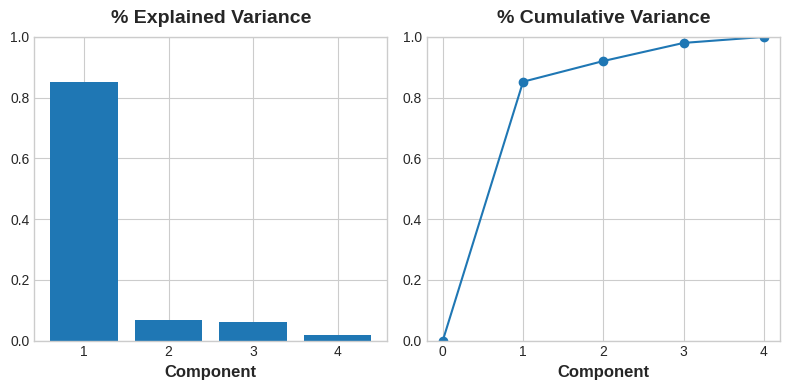

In [25]:
plot_variance(pca);

In [26]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    0.994583
PC2    0.341717
PC3    0.226234
PC4    0.203451
Name: MI Scores, dtype: float64

In [27]:
pca.explained_variance_ratio_

array([0.85236218, 0.06817041, 0.0596433 , 0.0198241 ])

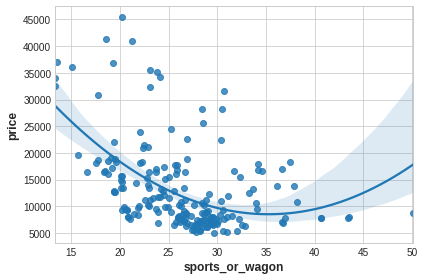

In [30]:
df["sports_or_wagon"] = X['curb-weight'] / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);